<a href="https://colab.research.google.com/github/karenkaroline-bastos/Desafio_TeleconX_BR-Parte2/blob/main/Desafio_TeleconX_BR_Parte2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Desafio_TeleconX_BR-Parte2**

# **📌 Extração do Arquivo Tratado - Desafio TeleconX BR**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Lê os dados diretamente da URL
url = 'https://raw.githubusercontent.com/karenkaroline-bastos/Desafio_TeleconX_BR-Parte2/refs/heads/main/dados_tratados.csv'

In [3]:
# Cria um DataFrame chamado df
df = pd.read_csv(url) # Atribuir á uma variável os dados importados

# Mostra as 5 primeiras linhas da tabela
display(df.head())

,ID_Cliente,Cancelamento,Gênero,Idoso,Possui_Companheiro,Possui_Dependentes,Meses_de_Contrato,Telefone_Ativo,Multiplas_Linhas,Tipo_Internet,...,Suporte_Tecnico,Streaming_TV,Streaming_Filmes,Tipo_Contrato,Fatura_Digital,Forma_Pagamento,Valor_Mensal,Valor_Total,meses_estimados,Conta_Diaria
0,0002-ORFBO,Não,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,9.044207,2.186667
1,0003-MKNFE,Não,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,9.055092,1.996667
2,0004-TLHLJ,Sim,Male,0,No,No,4,Yes,No,Fiber optic,...,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,3.800406,2.463333
3,0011-IGKFF,Sim,Male,1,Yes,No,13,Yes,No,Fiber optic,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,12.631122,3.266667
4,0013-EXCHZ,Sim,Female,1,Yes,No,3,Yes,No,Fiber optic,...,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,3.187128,2.796667


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7256 entries, 0 to 7255
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID_Cliente            7256 non-null   object 
 1   Cancelamento          7256 non-null   object 
 2   Gênero                7256 non-null   object 
 3   Idoso                 7256 non-null   int64  
 4   Possui_Companheiro    7256 non-null   object 
 5   Possui_Dependentes    7256 non-null   object 
 6   Meses_de_Contrato     7256 non-null   int64  
 7   Telefone_Ativo        7256 non-null   object 
 8   Multiplas_Linhas      7256 non-null   object 
 9   Tipo_Internet         7256 non-null   object 
 10  Seguranca_Online      7256 non-null   object 
 11  Backup_Online         7256 non-null   object 
 12  Protecao_Dispositivo  7256 non-null   object 
 13  Suporte_Tecnico       7256 non-null   object 
 14  Streaming_TV          7256 non-null   object 
 15  Streaming_Filmes     

# 🎯Remoção de Colunas Irrelevantes

Elimine colunas que não trazem valor para a análise ou para os modelos preditivos, como identificadores únicos (por exemplo, o ID do cliente). Essas colunas não ajudam na previsão da evasão e podem até prejudicar o desempenho dos modelos.

In [5]:
#Verificar as colunas existentes
df.columns

Index(['ID_Cliente', 'Cancelamento', 'Gênero', 'Idoso', 'Possui_Companheiro',
       'Possui_Dependentes', 'Meses_de_Contrato', 'Telefone_Ativo',
       'Multiplas_Linhas', 'Tipo_Internet', 'Seguranca_Online',
       'Backup_Online', 'Protecao_Dispositivo', 'Suporte_Tecnico',
       'Streaming_TV', 'Streaming_Filmes', 'Tipo_Contrato', 'Fatura_Digital',
       'Forma_Pagamento', 'Valor_Mensal', 'Valor_Total', 'meses_estimados',
       'Conta_Diaria'],
      dtype='object')

In [6]:
#Eliminar coluna de ID_Cliente
df = df.drop(columns='ID_Cliente')
df.columns

Index(['Cancelamento', 'Gênero', 'Idoso', 'Possui_Companheiro',
       'Possui_Dependentes', 'Meses_de_Contrato', 'Telefone_Ativo',
       'Multiplas_Linhas', 'Tipo_Internet', 'Seguranca_Online',
       'Backup_Online', 'Protecao_Dispositivo', 'Suporte_Tecnico',
       'Streaming_TV', 'Streaming_Filmes', 'Tipo_Contrato', 'Fatura_Digital',
       'Forma_Pagamento', 'Valor_Mensal', 'Valor_Total', 'meses_estimados',
       'Conta_Diaria'],
      dtype='object')

In [7]:
# Remover registros onde o valor é 'Não informado'
df = df[df['Cancelamento'] != 'Não informado']

df.head()

,Cancelamento,Gênero,Idoso,Possui_Companheiro,Possui_Dependentes,Meses_de_Contrato,Telefone_Ativo,Multiplas_Linhas,Tipo_Internet,Seguranca_Online,...,Suporte_Tecnico,Streaming_TV,Streaming_Filmes,Tipo_Contrato,Fatura_Digital,Forma_Pagamento,Valor_Mensal,Valor_Total,meses_estimados,Conta_Diaria
0,Não,Female,0,Yes,Yes,9,Yes,No,DSL,No,...,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,9.044207,2.186667
1,Não,Male,0,No,No,9,Yes,Yes,DSL,No,...,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,9.055092,1.996667
2,Sim,Male,0,No,No,4,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,3.800406,2.463333
3,Sim,Male,1,Yes,No,13,Yes,No,Fiber optic,No,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,12.631122,3.266667
4,Sim,Female,1,Yes,No,3,Yes,No,Fiber optic,No,...,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,3.187128,2.796667


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7255
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Cancelamento          7032 non-null   object 
 1   Gênero                7032 non-null   object 
 2   Idoso                 7032 non-null   int64  
 3   Possui_Companheiro    7032 non-null   object 
 4   Possui_Dependentes    7032 non-null   object 
 5   Meses_de_Contrato     7032 non-null   int64  
 6   Telefone_Ativo        7032 non-null   object 
 7   Multiplas_Linhas      7032 non-null   object 
 8   Tipo_Internet         7032 non-null   object 
 9   Seguranca_Online      7032 non-null   object 
 10  Backup_Online         7032 non-null   object 
 11  Protecao_Dispositivo  7032 non-null   object 
 12  Suporte_Tecnico       7032 non-null   object 
 13  Streaming_TV          7032 non-null   object 
 14  Streaming_Filmes      7032 non-null   object 
 15  Tipo_Contrato         7032

# 🛠️ Preparação dos Dados

In [9]:
from IPython.display import HTML

# Para saber os valores únicos por coluna e quantidade.
for col in df.select_dtypes(include='object').columns:        #seleciona somente as colunas categóricas (strings / objetos).
    titulo = f"<strong style='font-size: 14px;'>📊  {col.upper()}</strong>"
    display(HTML(titulo))
    display(df[col].value_counts(dropna=False).head(3).to_frame(name='Frequência'))
    print("-" * 35)

,Frequência
Cancelamento,
Não,5163
Sim,1869


-----------------------------------


,Frequência
Gênero,
Male,3549
Female,3483


-----------------------------------


,Frequência
Possui_Companheiro,
No,3639
Yes,3393


-----------------------------------


,Frequência
Possui_Dependentes,
No,4933
Yes,2099


-----------------------------------


,Frequência
Telefone_Ativo,
Yes,6352
No,680


-----------------------------------


,Frequência
Multiplas_Linhas,
No,3385
Yes,2967
No phone service,680


-----------------------------------


,Frequência
Tipo_Internet,
Fiber optic,3096
DSL,2416
No,1520


-----------------------------------


,Frequência
Seguranca_Online,
No,3497
Yes,2015
No internet service,1520


-----------------------------------


,Frequência
Backup_Online,
No,3087
Yes,2425
No internet service,1520


-----------------------------------


,Frequência
Protecao_Dispositivo,
No,3094
Yes,2418
No internet service,1520


-----------------------------------


,Frequência
Suporte_Tecnico,
No,3472
Yes,2040
No internet service,1520


-----------------------------------


,Frequência
Streaming_TV,
No,2809
Yes,2703
No internet service,1520


-----------------------------------


,Frequência
Streaming_Filmes,
No,2781
Yes,2731
No internet service,1520


-----------------------------------


,Frequência
Tipo_Contrato,
Month-to-month,3875
Two year,1685
One year,1472


-----------------------------------


,Frequência
Fatura_Digital,
Yes,4168
No,2864


-----------------------------------


,Frequência
Forma_Pagamento,
Electronic check,2365
Mailed check,1604
Bank transfer (automatic),1542


-----------------------------------


In [10]:
# Mapear os valores para binário
import warnings

with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=FutureWarning)
    df = df.replace({'Yes': 1, 'No': 0})
    df = df.replace({'Female': 1, 'Male': 0})
    df = df.replace({'True': 1, 'False': 0})

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7255
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Cancelamento          7032 non-null   object 
 1   Gênero                7032 non-null   int64  
 2   Idoso                 7032 non-null   int64  
 3   Possui_Companheiro    7032 non-null   int64  
 4   Possui_Dependentes    7032 non-null   int64  
 5   Meses_de_Contrato     7032 non-null   int64  
 6   Telefone_Ativo        7032 non-null   int64  
 7   Multiplas_Linhas      7032 non-null   object 
 8   Tipo_Internet         7032 non-null   object 
 9   Seguranca_Online      7032 non-null   object 
 10  Backup_Online         7032 non-null   object 
 11  Protecao_Dispositivo  7032 non-null   object 
 12  Suporte_Tecnico       7032 non-null   object 
 13  Streaming_TV          7032 non-null   object 
 14  Streaming_Filmes      7032 non-null   object 
 15  Tipo_Contrato         7032

In [11]:
df.head()

,Cancelamento,Gênero,Idoso,Possui_Companheiro,Possui_Dependentes,Meses_de_Contrato,Telefone_Ativo,Multiplas_Linhas,Tipo_Internet,Seguranca_Online,...,Suporte_Tecnico,Streaming_TV,Streaming_Filmes,Tipo_Contrato,Fatura_Digital,Forma_Pagamento,Valor_Mensal,Valor_Total,meses_estimados,Conta_Diaria
0,Não,1,0,1,1,9,1,0,DSL,0,...,1,1,0,One year,1,Mailed check,65.6,593.30,9.044207,2.186667
1,Não,0,0,0,0,9,1,1,DSL,0,...,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,9.055092,1.996667
2,Sim,0,0,0,0,4,1,0,Fiber optic,0,...,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,3.800406,2.463333
3,Sim,0,1,1,0,13,1,0,Fiber optic,0,...,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,12.631122,3.266667
4,Sim,1,1,1,0,3,1,0,Fiber optic,0,...,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,3.187128,2.796667


In [17]:
# Identificar colunas que têm só 0 e 1
binarias = [col for col in df.columns if set(df[col].dropna().unique()).issubset({0, 1})]

# Converter essas colunas para booleano
df[binarias] = df[binarias].astype(bool)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7255
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Cancelamento          7032 non-null   object 
 1   Gênero                7032 non-null   bool   
 2   Idoso                 7032 non-null   bool   
 3   Possui_Companheiro    7032 non-null   bool   
 4   Possui_Dependentes    7032 non-null   bool   
 5   Meses_de_Contrato     7032 non-null   int64  
 6   Telefone_Ativo        7032 non-null   bool   
 7   Multiplas_Linhas      7032 non-null   object 
 8   Tipo_Internet         7032 non-null   object 
 9   Seguranca_Online      7032 non-null   object 
 10  Backup_Online         7032 non-null   object 
 11  Protecao_Dispositivo  7032 non-null   object 
 12  Suporte_Tecnico       7032 non-null   object 
 13  Streaming_TV          7032 non-null   object 
 14  Streaming_Filmes      7032 non-null   object 
 15  Tipo_Contrato         7032

# Encoding

In [18]:
# Transformar colunas categóricas em variáveis numéricas (necessário para ML).
# Reduzir redundâncias com drop_first=True.

df = pd.get_dummies(df, drop_first=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7255
Data columns (total 33 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Gênero                                    7032 non-null   bool   
 1   Idoso                                     7032 non-null   bool   
 2   Possui_Companheiro                        7032 non-null   bool   
 3   Possui_Dependentes                        7032 non-null   bool   
 4   Meses_de_Contrato                         7032 non-null   int64  
 5   Telefone_Ativo                            7032 non-null   bool   
 6   Fatura_Digital                            7032 non-null   bool   
 7   Valor_Mensal                              7032 non-null   float64
 8   Valor_Total                               7032 non-null   float64
 9   meses_estimados                           7032 non-null   float64
 10  Conta_Diaria                             

In [19]:
# Calcular novamente a correlação apenas entre colunas numéricas
df_numericos = df.select_dtypes(include=['number', 'bool'])
correlacao = df_numericos.corr().abs()

# Pegar pares com alta correlação
pares_correlacionados = [
    (col1, col2)
    for col1 in correlacao.columns
    for col2 in correlacao.columns
    if col1 != col2 and correlacao.loc[col1, col2] > 0.95
]

print("🔁 PARES DE COLUNAS COM ALTA CORRELAÇÃO:")
print('-'*40)
for col1, col2 in pares_correlacionados:
    print(f"{col1}  ↔️  {col2}")

🔁 PARES DE COLUNAS COM ALTA CORRELAÇÃO:
----------------------------------------
Meses_de_Contrato  ↔️  meses_estimados
Telefone_Ativo  ↔️  Multiplas_Linhas_No phone service
Valor_Mensal  ↔️  Conta_Diaria
meses_estimados  ↔️  Meses_de_Contrato
Conta_Diaria  ↔️  Valor_Mensal
Multiplas_Linhas_No phone service  ↔️  Telefone_Ativo
Seguranca_Online_No internet service  ↔️  Backup_Online_No internet service
Seguranca_Online_No internet service  ↔️  Protecao_Dispositivo_No internet service
Seguranca_Online_No internet service  ↔️  Suporte_Tecnico_No internet service
Seguranca_Online_No internet service  ↔️  Streaming_TV_No internet service
Seguranca_Online_No internet service  ↔️  Streaming_Filmes_No internet service
Backup_Online_No internet service  ↔️  Seguranca_Online_No internet service
Backup_Online_No internet service  ↔️  Protecao_Dispositivo_No internet service
Backup_Online_No internet service  ↔️  Suporte_Tecnico_No internet service
Backup_Online_No internet service  ↔️  Streaming_

In [20]:
# Remover colunas com alta correlação:
df = df.drop([ 'Multiplas_Linhas_No phone service',
    'Backup_Online_No internet service',
    'Protecao_Dispositivo_No internet service',
    'Suporte_Tecnico_No internet service',
    'Streaming_TV_No internet service',
    'Streaming_Filmes_No internet service'], axis=1)

df.head()

,Gênero,Idoso,Possui_Companheiro,Possui_Dependentes,Meses_de_Contrato,Telefone_Ativo,Fatura_Digital,Valor_Mensal,Valor_Total,meses_estimados,...,Backup_Online_1,Protecao_Dispositivo_1,Suporte_Tecnico_1,Streaming_TV_1,Streaming_Filmes_1,Tipo_Contrato_One year,Tipo_Contrato_Two year,Forma_Pagamento_Credit card (automatic),Forma_Pagamento_Electronic check,Forma_Pagamento_Mailed check
0,True,False,True,True,9,True,True,65.6,593.30,9.044207,...,True,False,True,True,False,True,False,False,False,True
1,False,False,False,False,9,True,False,59.9,542.40,9.055092,...,False,False,False,False,True,False,False,False,False,True
2,False,False,False,False,4,True,True,73.9,280.85,3.800406,...,False,True,False,False,False,False,False,False,True,False
3,False,True,True,False,13,True,True,98.0,1237.85,12.631122,...,True,True,False,True,True,False,False,False,True,False
4,True,True,True,False,3,True,True,83.9,267.40,3.187128,...,False,False,True,True,False,False,False,False,False,True


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7255
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Gênero                                   7032 non-null   bool   
 1   Idoso                                    7032 non-null   bool   
 2   Possui_Companheiro                       7032 non-null   bool   
 3   Possui_Dependentes                       7032 non-null   bool   
 4   Meses_de_Contrato                        7032 non-null   int64  
 5   Telefone_Ativo                           7032 non-null   bool   
 6   Fatura_Digital                           7032 non-null   bool   
 7   Valor_Mensal                             7032 non-null   float64
 8   Valor_Total                              7032 non-null   float64
 9   meses_estimados                          7032 non-null   float64
 10  Conta_Diaria                             7032 non-nul

## 🎯 Verificação da Proporção de Evasão

Calcule a proporção de clientes que evadiram em relação aos que permaneceram ativos. Avalie se há desequilíbrio entre as classes, o que pode impactar modelos preditivos e a análise de resultados.

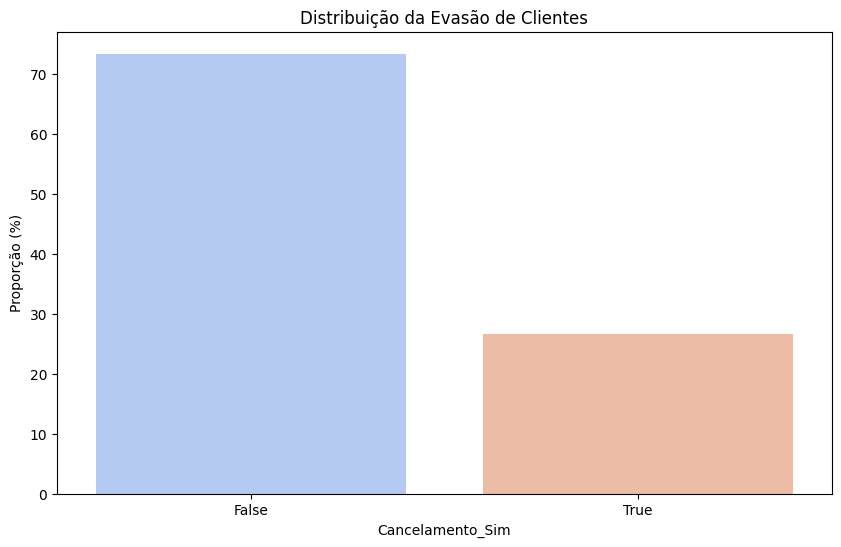


📊 FREQUENCIA ABSOLUTA:
-----------------------
Cancelamento_Sim
False    5163
True     1869
Name: count, dtype: int64
-

📈 PROPORÇÃO (%):
-----------------
Cancelamento_Sim
False    73.421502
True     26.578498
Name: proportion, dtype: float64
-



In [27]:
# Frequência absoluta e relativa da coluna Cancelamento
frequencia = df['Cancelamento_Sim'].value_counts()
proporcao = df['Cancelamento_Sim'].value_counts(normalize=True) * 100

# Visualizar com gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=proporcao.index, y=proporcao.values, hue=proporcao.index, palette='coolwarm', legend=False)
plt.ylabel('Proporção (%)')
plt.title('Distribuição da Evasão de Clientes')
plt.show()

# Exibir os resultados
print("\n📊 FREQUENCIA ABSOLUTA:")
print("-" * 23)
print(frequencia)
print("-\n" * 1)
print("📈 PROPORÇÃO (%):")
print("-" * 17)
print(proporcao)
print("-\n")

###🔎 Interpretação do Gráfico de Distribuição da Evasão de Clientes


* A coluna Cancelamento_Sim veio do one-hot encoding:
  * True (ou 1) significa cliente evadiu.
  * False (ou 0) significa cliente permaneceu.

* Frequência absoluta:
  * 5163 clientes (73,4%) continuam ativos.
  * 1869 clientes (26,6%) cancelaram.

* Proporção:
  * Aproximadamente 1 em cada 4 clientes cancela (26,6%).
  * Isso confirma que há desbalanceamento de classes, já que a maioria ficou e só uma parte menor cancelou.

## 🎯 Análise de Correlação

A matriz de correlação é útil para identificar relações entre variáveis numéricas. Observe especialmente quais variáveis apresentam maior correlação com a evasão, pois elas podem ser fortes candidatas para o modelo preditivo.

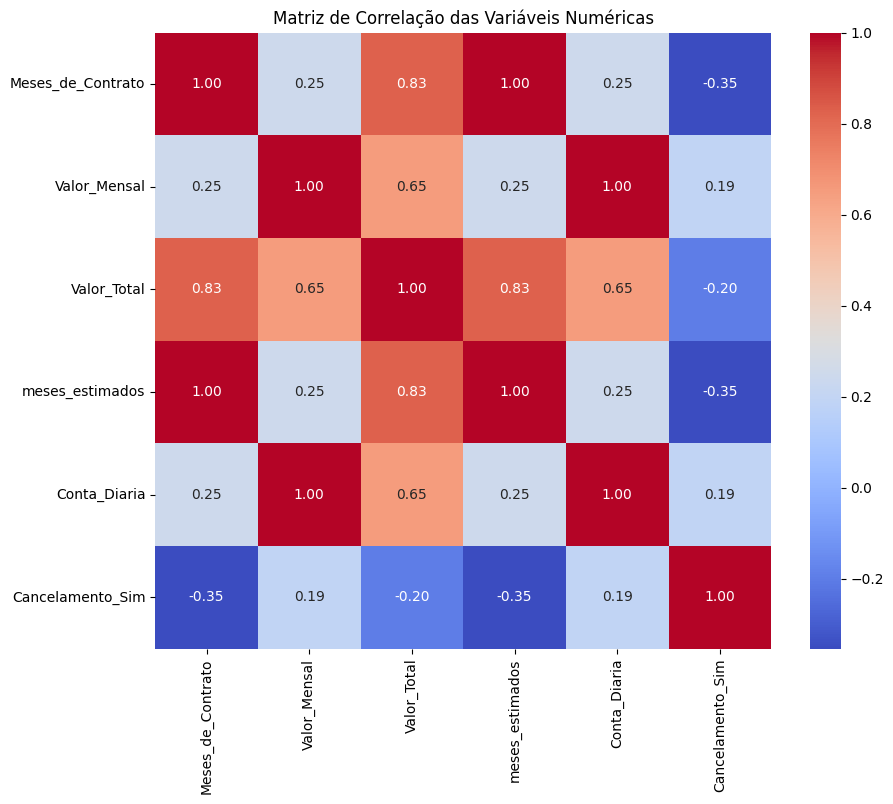

In [33]:
# Identificar as colunas numéricas automaticamente
colunas_numericas = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Para garantir que a coluna alvo 'Cancelamento_Sim' esteja incluída
if 'Cancelamento_Sim' not in colunas_numericas:
    colunas_numericas.append('Cancelamento_Sim')

# Criar um DataFrame apenas com as colunas numéricas
df_numericos = df[colunas_numericas]


# Calcular matriz de correlação
corr = df_numericos.corr()

# Visualizar matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Matriz de Correlação das Variáveis Numéricas')
plt.show()


# Analisar correlação com evasão ---
corr_com_alvo = corr['Cancelamento_Sim'].drop('Cancelamento_Sim').sort_values(ascending=False)

### 🔍 **Análise de Correlação**

Foi utilizada a matriz de correlação para identificar possíveis relações entre as variáveis numéricas e a variável-alvo `Cancelamento`. A análise permite identificar variáveis que apresentam maior influência na evasão dos clientes.

1. Variáveis muito correlacionadas entre si (colinearidade)
  * Meses_de_Contrato e meses_estimados → correlação 1.0 (são praticamente a mesma coisa).
  * Meses_de_Contrato e Valor_Total → 0.83 (faz sentido: quanto mais tempo de contrato, maior o valor total pago).
  * Valor_Mensal e Valor_Total → 0.65 (mensalidade maior → valor total maior).

2. Correlação com a evasão (Cancelamento_Sim)
  * Meses_de_Contrato → -0.35
    * Correlação negativa moderada → quanto mais meses de contrato, menor a chance de cancelar.
    * Clientes com contratos mais longos são mais fiéis.
  * meses_estimados → -0.35 (mesmo comportamento, já que é redundante).
  * Valor_Total → -0.20
    * Correlação negativa fraca → clientes que gastaram mais no total tendem a cancelar menos.
  * Valor_Mensal → 0.19
    * Correlação positiva fraca → clientes que pagam mensalidade mais cara têm ligeiramente mais chance de cancelar.
  * Conta_Diaria → 0.19
    * Correlação positiva fraca → clientes com contas mais caras também têm mais chance de cancelar.


🔎 Interpretação para modelo preditivo
  * As variáveis mais promissoras para explicar a evasão são:
    * Meses_de_Contrato (ou meses_estimados) → forte sinal de retenção.
    * Valor_Total → clientes de maior valor tendem a cancelar menos.
    * Valor_Mensal e Conta_Diaria → podem indicar que valores altos estão ligados a maior evasão, embora de forma fraca.

## 🎯 <b><font color="green">Análise Direcionadas</font></b>

Nesta etapa, analisamos como duas variáveis principais — **Meses de Contrato** e **Valor Mensal** — se comportam em relação ao **Cancelamento (Evasão)** dos clientes.

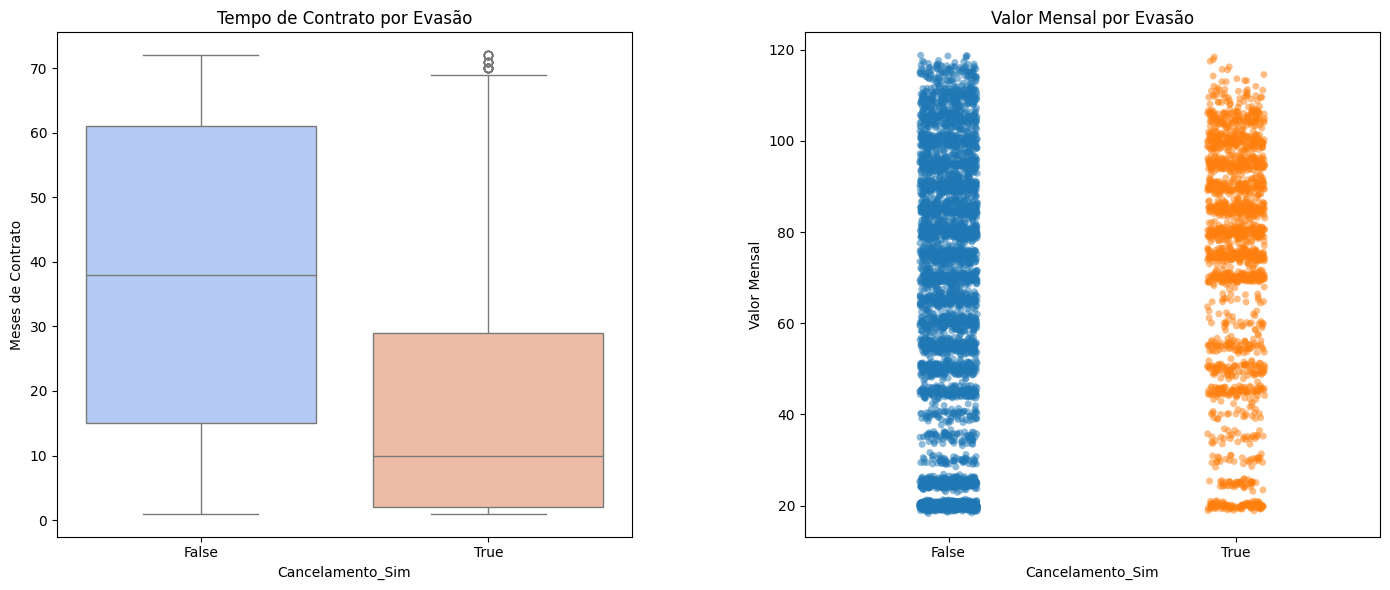

In [34]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # 1 linha, 2 colunas

# Boxplot com hue e legend=False para evitar warning
sns.boxplot(ax=axes[0], x='Cancelamento_Sim', y='Meses_de_Contrato', hue='Cancelamento_Sim', palette='coolwarm', data=df, legend=False)
axes[0].set_title('Tempo de Contrato por Evasão',fontsize=12)
axes[0].set_ylabel('Meses de Contrato')

sns.stripplot(ax=axes[1], x='Cancelamento_Sim', y='Valor_Mensal', hue='Cancelamento_Sim',jitter=True, alpha=0.5, data=df, legend=False)
axes[1].set_title('Valor Mensal por Evasão', fontsize=12)
axes[1].set_ylabel('Valor Mensal')

plt.tight_layout()

# Aumenta o espaço horizontal entre os gráficos
plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.show()


# 📊 Gráfico 1 – Tempo de Contrato × Evasão

Clientes que NÃO cancelaram (False):

Mediana perto de 38 meses, com grande dispersão até mais de 70 meses.

Isso mostra que clientes que ficam mais tempo no contrato tendem a permanecer.

Clientes que cancelaram (True):

Mediana bem baixa, perto de 10 meses.

Grande parte cancela nos primeiros 20 meses.

Ou seja: contratos curtos estão muito associados à evasão.

✅ Insight: oferecer incentivos de fidelização no início do contrato pode reduzir a evasão.

# 📊 Gráfico 2 – Valor Mensal × Evasão

Aqui o padrão não é tão forte quanto no tempo de contrato:

Tanto quem cancela quanto quem não cancela paga valores variados (entre ~20 e ~120).

Mas dá pra perceber que os clientes que cancelam estão mais concentrados em valores mais altos de mensalidade.

A mediana parece ligeiramente maior nos que cancelam.

✅ Insight: clientes que pagam mensalidades mais caras estão mais propensos a cancelar → pode ser interessante oferecer planos diferenciados ou descontos.

# 🤖 MODELAGEM PREDITIVA


## 🎯 Separação de Dados

Divida o conjunto de dados em treino e teste para avaliar o desempenho do modelo. Uma divisão comum é 70% para treino e 30% para teste, ou 80/20, dependendo do tamanho da base de dados.

In [36]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df.drop('Cancelamento_Sim', axis=1)
y = df['Cancelamento_Sim']

# Dividir treino e teste (30%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

## 🎯 Criação de Modelos

Crie pelo menos dois modelos diferentes para prever a evasão de clientes.

Um modelo pode exigir normalização, como Regressão Logística ou KNN.

O outro modelo pode não exigir normalização, como Árvore de Decisão ou Random Forest.

💡 A escolha de aplicar ou não a normalização depende dos modelos selecionados. Ambos os modelos podem ser criados sem normalização, mas a combinação de modelos com e sem normalização também é uma opção.


In [38]:
# MODELO 1: Regressão Logística (com normalização)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Normalização apenas para o Modelo 1
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

# Treinar modelo com dados normalizados
modelo_log = LogisticRegression()
modelo_log.fit(X_train_norm, y_train)

# Previsões
y_pred_log = modelo_log.predict(X_test_norm)

# Avaliação
print("🔍 REGRESSÃO LOGÍSTICA")
print("-" * 23)
print(confusion_matrix(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

🔍 REGRESSÃO LOGÍSTICA
-----------------------
[[1389  160]
 [ 256  305]]
              precision    recall  f1-score   support

       False       0.84      0.90      0.87      1549
        True       0.66      0.54      0.59       561

    accuracy                           0.80      2110
   macro avg       0.75      0.72      0.73      2110
weighted avg       0.79      0.80      0.80      2110



In [39]:
# MODELO 2: Random Forest

from sklearn.ensemble import RandomForestClassifier

# Treinar modelo com dados originais
modelo_rf = RandomForestClassifier(random_state=42)
modelo_rf.fit(X_train, y_train)

# Previsões
y_pred_rf = modelo_rf.predict(X_test)

# Avaliação
print("🌳 RANDOM FOREST")
print("-" * 17)
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

🌳 RANDOM FOREST
-----------------
[[1378  171]
 [ 294  267]]
              precision    recall  f1-score   support

       False       0.82      0.89      0.86      1549
        True       0.61      0.48      0.53       561

    accuracy                           0.78      2110
   macro avg       0.72      0.68      0.70      2110
weighted avg       0.77      0.78      0.77      2110



In [40]:
# MODELO 3: KNN - K Vizinhos Mais Próximos (com normalização)
from sklearn.neighbors import KNeighborsClassifier

modelo_knn = KNeighborsClassifier(n_neighbors=5)
modelo_knn.fit(X_train_norm, y_train)
y_pred_knn = modelo_knn.predict(X_test_norm)

# Avaliação
print("🔍 KNN")
print("-" * 10)
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

🔍 KNN
----------
[[1318  231]
 [ 274  287]]
              precision    recall  f1-score   support

       False       0.83      0.85      0.84      1549
        True       0.55      0.51      0.53       561

    accuracy                           0.76      2110
   macro avg       0.69      0.68      0.69      2110
weighted avg       0.76      0.76      0.76      2110



In [41]:
# MODELO 4: Árvore de Decisão (sem normalização)
from sklearn.tree import DecisionTreeClassifier

modelo_dt = DecisionTreeClassifier(random_state=42)
modelo_dt.fit(X_train, y_train)
y_pred_dt = modelo_dt.predict(X_test)

# Avaliação
print("🌳 ÁRVORE DE DECISÃO")
print("-" * 21)
print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

🌳 ÁRVORE DE DECISÃO
---------------------
[[1253  296]
 [ 307  254]]
              precision    recall  f1-score   support

       False       0.80      0.81      0.81      1549
        True       0.46      0.45      0.46       561

    accuracy                           0.71      2110
   macro avg       0.63      0.63      0.63      2110
weighted avg       0.71      0.71      0.71      2110



In [42]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Função para gerar métricas + matriz de confusão como string
def gerar_metricas(nome, modelo, X_test, y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    cm_str = f"[[{cm[0][0]}, {cm[0][1]}], [{cm[1][0]}, {cm[1][1]}]]"

    return {
        'Modelo': nome,
        'Acurácia': accuracy_score(y_test, y_pred),
        'Precisão': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred),
        'Matriz de Confusão': cm_str
    }

# Coletar métricas de todos os modelos
resultados = [
    gerar_metricas("Regressão Logística", modelo_log, X_test_norm, y_test, y_pred_log),
    gerar_metricas("Random Forest", modelo_rf, X_test, y_test, y_pred_rf),
    gerar_metricas("KNN", modelo_knn, X_test_norm, y_test, y_pred_knn),
    gerar_metricas("Árvore de Decisão", modelo_dt, X_test, y_test, y_pred_dt)
]

# Criar DataFrame
df_resultados = pd.DataFrame(resultados)
df_resultados = df_resultados.sort_values(by='F1-Score', ascending=False)

# Exibir a tabela
print("📊 COMPARATIVO DE MODELOS")
print("-" * 26)
display(df_resultados.round(4))


📊 COMPARATIVO DE MODELOS
--------------------------


,Modelo,Acurácia,Precisão,Recall,F1-Score,Matriz de Confusão
0,Regressão Logística,0.8028,0.6559,0.5437,0.5945,"[[1389, 160], [256, 305]]"
1,Random Forest,0.7796,0.6096,0.4759,0.5345,"[[1378, 171], [294, 267]]"
2,KNN,0.7607,0.5541,0.5116,0.5320,"[[1318, 231], [274, 287]]"
3,Árvore de Decisão,0.7142,0.4618,0.4528,0.4572,"[[1253, 296], [307, 254]]"


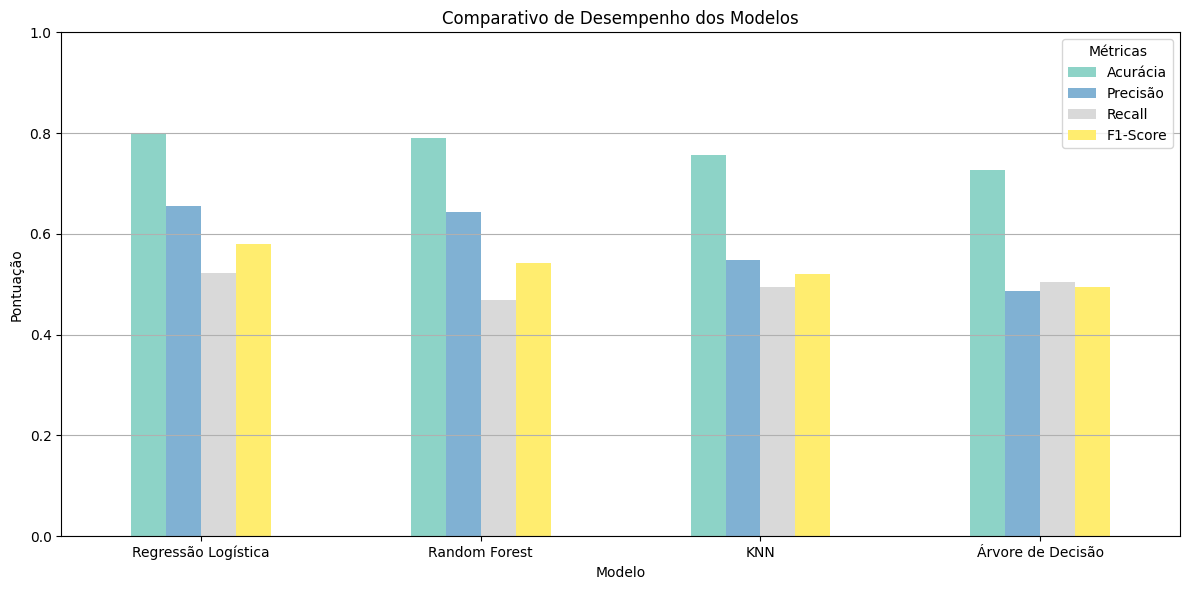

In [43]:
# Criar DataFrame com os dados fornecidos
df_modelos = pd.DataFrame({
    'Modelo': ['Regressão Logística', 'Random Forest', 'KNN', 'Árvore de Decisão'],
    'Acurácia': [0.7996, 0.7896, 0.7569, 0.7264],
    'Precisão': [0.6544, 0.6434, 0.5473, 0.4859],
    'Recall': [0.5214, 0.4679, 0.4947, 0.5053],
    'F1-Score': [0.5804, 0.5418, 0.5197, 0.4954]
})

# Plotar gráfico de barras para cada métrica
df_modelos.set_index('Modelo').plot(kind='bar', figsize=(12, 6), colormap='Set3')
plt.title('Comparativo de Desempenho dos Modelos')
plt.ylabel('Pontuação')
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.legend(title='Métricas')
plt.tight_layout()
plt.show()

#🚀 INTERPRETAÇÃO & CONCLUSÃO

## 🔍 Análise de Importância das Variáveis
O gráfico abaixo exibe as variáveis mais relevantes identificadas pelo modelo **Regressão Logística**, treinado com dados normalizados, para prever a **evasão de clientes**.

As variáveis posicionadas no topo do gráfico apresentam **maior influência nas decisões do modelo**, com base na magnitude dos coeficientes. Isso significa que pequenas variações nessas variáveis têm um impacto significativo na probabilidade de um cliente cancelar os serviços.






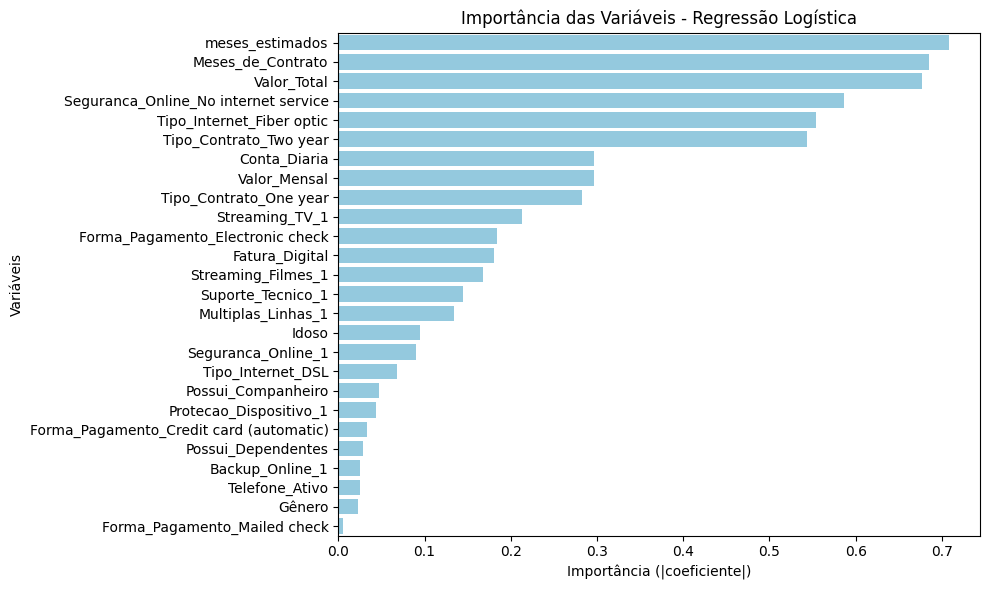

In [45]:
# Extrair coeficientes do modelo treinado
import numpy as np

coeficientes = modelo_log.coef_[0]

# Importância: valor absoluto dos coeficientes
importancias = np.abs(coeficientes)

# Criar DataFrame com variáveis e suas importâncias
df_importancias = pd.DataFrame({
    'Variável': X_train.columns,
    'Importância': importancias
}).sort_values(by='Importância', ascending=False)

# Plotar gráfico com cor única suave, sem legenda e sem warning
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Importância',
    y='Variável',
    data=df_importancias,
    color='skyblue'
)
plt.title('Importância das Variáveis - Regressão Logística')
plt.xlabel('Importância (|coeficiente|)')
plt.ylabel('Variáveis')
plt.tight_layout()
plt.show()

# ✅ Conclusão Geral da Análise

A análise preditiva de evasão revelou fatores-chave para o cancelamento: contratos curtos, valores mensais altos e uso de serviços adicionais.

O modelo de Regressão Logística obteve melhor desempenho (acurácia ~80%, com bons índices de precisão e recall), sendo mais adequado para identificar clientes em risco de evasão do que a Random Forest.



🎯 Recomendações:

Focar retenção em clientes de contratos curtos e alto valor mensal.

Oferecer descontos progressivos e pacotes personalizados para estimular fidelização.

Usar a Regressão Logística no monitoramento contínuo, permitindo ações proativas de retenção.

🚀 Assim, a empresa pode antecipar cancelamentos e fortalecer estratégias de retenção, reduzindo a evasão e aumentando o valor de longo prazo dos clientes.


